In [ ]:
pip install -U finance_datareader


In [ ]:
pip install xmltodict

In [ ]:
import pandas as pd
import FinanceDataReader as fdr
from time import time
from concurrent.futures import ProcessPoolExecutor

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#from google.colab import files
#myfile = files.upload()

In [ ]:
#filename = 'data.csv'
#new_stock_code = pd.read_csv(filename)
#new_stock_code.head()

In [ ]:
df_ksp = fdr.StockListing('KOSPI')
df_ksp.head()


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
7,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
8,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시


In [ ]:
stock_code = df_ksp[['Symbol','Name']]
#stock_code.to_excel('code.xlsx')


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import xmltodict
import json

In [ ]:
def get_daily_stock_price(stockCode,name,count):
  global df
  if (len(stockCode) == 6 ) :
    headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
    url=f'https://fchart.stock.naver.com/sise.nhn?symbol={stockCode}&timeframe=day&count={count}&requestType=0'
    #print(url)
    rs = requests.get(url,headers = headers)
    dt = xmltodict.parse(rs.text) # 변환된 xml 파일을 dictionary 형태로 변환
    js = json.dumps(dt,indent=4)  # data 가공 편의를 위해서 json 형식으로 변환
    js = json.loads(js)
    data = pd.json_normalize(js['protocol']['chartdata']['item']) ## json_normalize를 이용해서 계층 구조를 없애고 dataframe으로 불러옴 
    df = data['@data'].str.split('|',expand=True) ## data 행에서 '|'기호 기준으로 split 한후 다시 결합... 그리고 data type 이 string 이어야 split 할 수 있으므로 str.split사용
    df.columns = ['data','open','high','low','close','Volume']
    df['name'] = str(name)  ## NAME 행을 만들어 기업명 추가
  return df

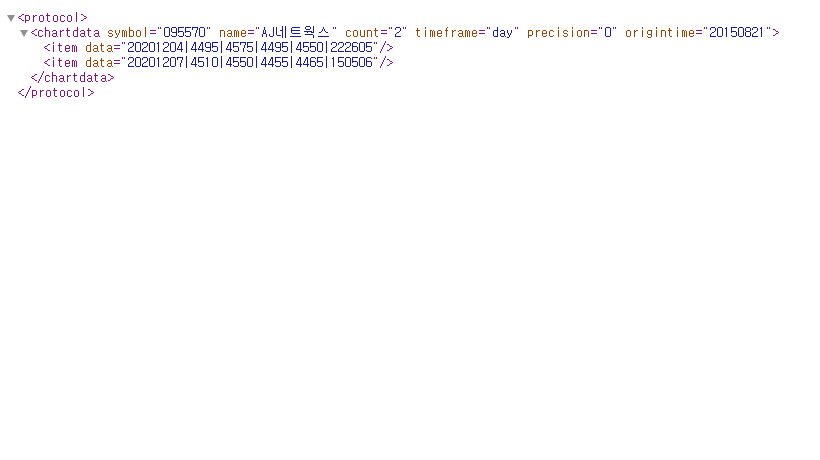

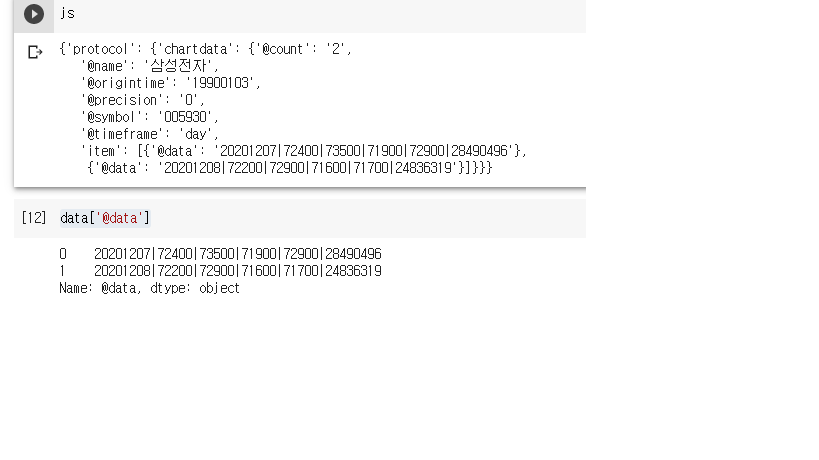

In [ ]:
tmp=[]

for index,row in stock_code.iterrows():
  tmp.append(get_daily_stock_price(row['Symbol'],row['Name'],'2500'))
  #tmp.append(get_daily_stock_price(row['종목코드'],row['기업명'],'2'))
  #print(tmp)
  #tmp.append(get_daily_stock_price(row['종목코드']))

In [ ]:
df_final = pd.concat(tmp,ignore_index=True)

In [ ]:
df_final.head()

,data,open,high,low,close,Volume,name
0,20150821,6180,7300,5600,7100,1994022,AJ네트웍스
1,20150824,6700,6940,6240,6480,392831,AJ네트웍스
2,20150825,6610,6730,6189,6220,242730,AJ네트웍스
3,20150826,6260,7760,6260,7090,703721,AJ네트웍스
4,20150827,7239,8060,6960,7570,499913,AJ네트웍스
...,...,...,...,...,...,...,...
2236123,20201201,0,0,0,258,0,흥아해운
2236124,20201202,0,0,0,258,0,흥아해운
2236125,20201203,0,0,0,258,0,흥아해운
2236126,20201204,0,0,0,258,0,흥아해운


In [ ]:

df_final.to_csv('NEW_KOSPI_10_years_data.csv',encoding='euc-kr')
